In [1]:
!ls

AB Testing.ipynb      Qestions.ipynb        car_data_mani.ipynb
ARIMA.ipynb           README.md             data
IPG2211A2N.csv        SQL.ipynb             python_question.ipynb
Numpy_exp.ipynb       Untitled.ipynb        question_2.ipynb
Pandas_exp.ipynb      Untitled1.ipynb       readychef.pgsql
Pandas_exp.md         X_hold.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('IPG2211A2N.csv')

In [4]:
df.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 2 columns):
DATE          968 non-null object
IPG2211A2N    968 non-null float64
dtypes: float64(1), object(1)
memory usage: 15.2+ KB


In [6]:
df['DATE'] = pd.to_datetime(df.DATE)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 2 columns):
DATE          968 non-null datetime64[ns]
IPG2211A2N    968 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.2 KB


In [8]:
df.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [9]:
df.columns=['date', 'production']

In [10]:
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


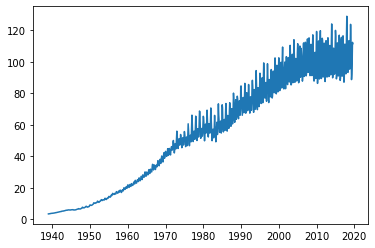

In [11]:
plt.plot(df.date, df.production)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df.index=df.date

In [14]:
df.drop('date', axis=1, inplace=True)

In [15]:
sd = seasonal_decompose(df, model='multiplicative')

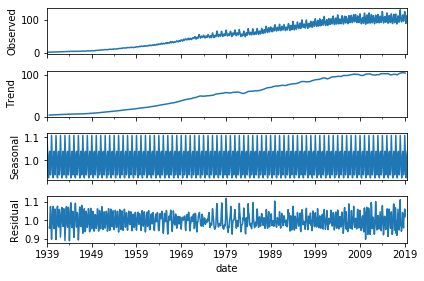

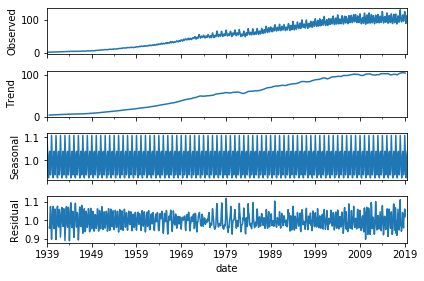

In [22]:
sd.plot()

In [24]:
from pmdarima import auto_arima

In [26]:
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3822.068, BIC=3846.376, Fit time=2.419 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4335.944, BIC=4345.667, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4167.207, BIC=4186.654, Fit time=0.594 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3945.584, BIC=3965.031, Fit time=0.767 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3821.169, BIC=3850.340, Fit time=4.020 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3999.209, BIC=4023.518, Fit time=2.887 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3814.587, BIC=3848.619, Fit time=9.560 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3937.745, BIC=3966.916, Fit time=3.517 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3812.209, BIC=3851.103, Fit time=12.883 seconds
Fit ARIMA: order=(2, 1, 0) 

In [27]:
print(stepwise_model.aic())

3771.6748561701597


In [29]:
train = df.loc['1985-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

In [30]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [39]:
future_forecast = stepwise_model.predict(n_periods=32)

In [40]:
future_forecast

array([121.6723423 , 109.27547487,  99.82132624,  89.6432809 ,
        90.85731477, 102.97275767, 112.59251489, 111.71152765,
       100.51407293,  90.87540825,  94.71973838, 110.86561134,
       119.58024519, 109.70564635, 100.6134172 ,  89.12978139,
        91.08559128, 102.27500784, 111.78302229, 110.71822815,
        99.98868241,  90.8366334 ,  95.0651435 , 108.98294995,
       119.1360509 , 109.6905233 , 100.13936231,  88.84782298,
        90.62187884, 101.98196775, 111.63591617, 110.60847668])

In [41]:
future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])

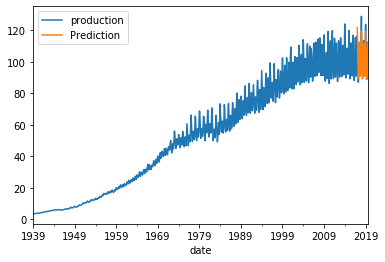

In [43]:
pd.concat([df,future_forecast],axis=1).plot()